In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/magnesium/Documents/Light House Labs Bootcamp/Projects/Final Project/data/air_quality_imputed.csv')

In [3]:
import folium

# Create a DataFrame with unique locations and their latitude/longitude
unique_locations = df[['location', 'latitude', 'longitude']].drop_duplicates()

# Create a map centered around the average latitude and longitude of your locations
avg_latitude = unique_locations['latitude'].mean()
avg_longitude = unique_locations['longitude'].mean()
my_map = folium.Map(location=[avg_latitude, avg_longitude], zoom_start=5)

# Add a marker for each unique location
for index, row in unique_locations.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['location'],
        icon=None,
    ).add_to(my_map)

# Show the map
my_map

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
import numpy as np

transformed_df = df.copy()
for col in pollutant_columns:
    transformed_data = np.log1p(transformed_df[col])  # Apply log(1+x) transformation
    transformed_df[col] = transformed_data

/Users/magnesium/opt/anaconda3/envs/lighthouse_labs_env/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


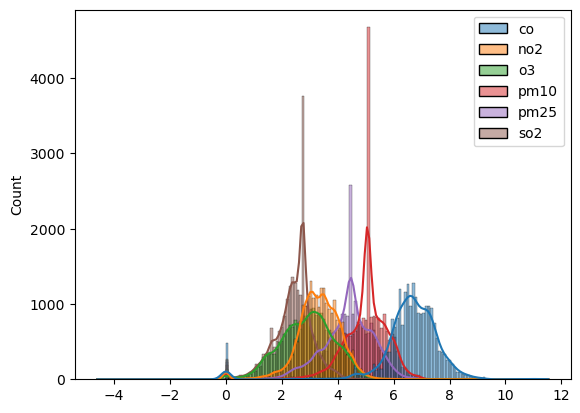

In [22]:
df_sample = transformed_df.sample(frac=0.1)  # This takes a random 10% sample of the data
sns.histplot(df_sample[['co', 'no2', 'o3', 'pm10', 'pm25', 'so2']], kde=True)
plt.show()

In [23]:
for location in df_sample['location'].unique():
    location_data = df_sample[df_sample['location'] == location]
    location_data.set_index('date_utc')[['co', 'no2', 'o3', 'pm10', 'pm25', 'so2']].plot()
    plt.title(location)
    plt.show()

KeyError: "None of ['date_utc'] are in the columns"

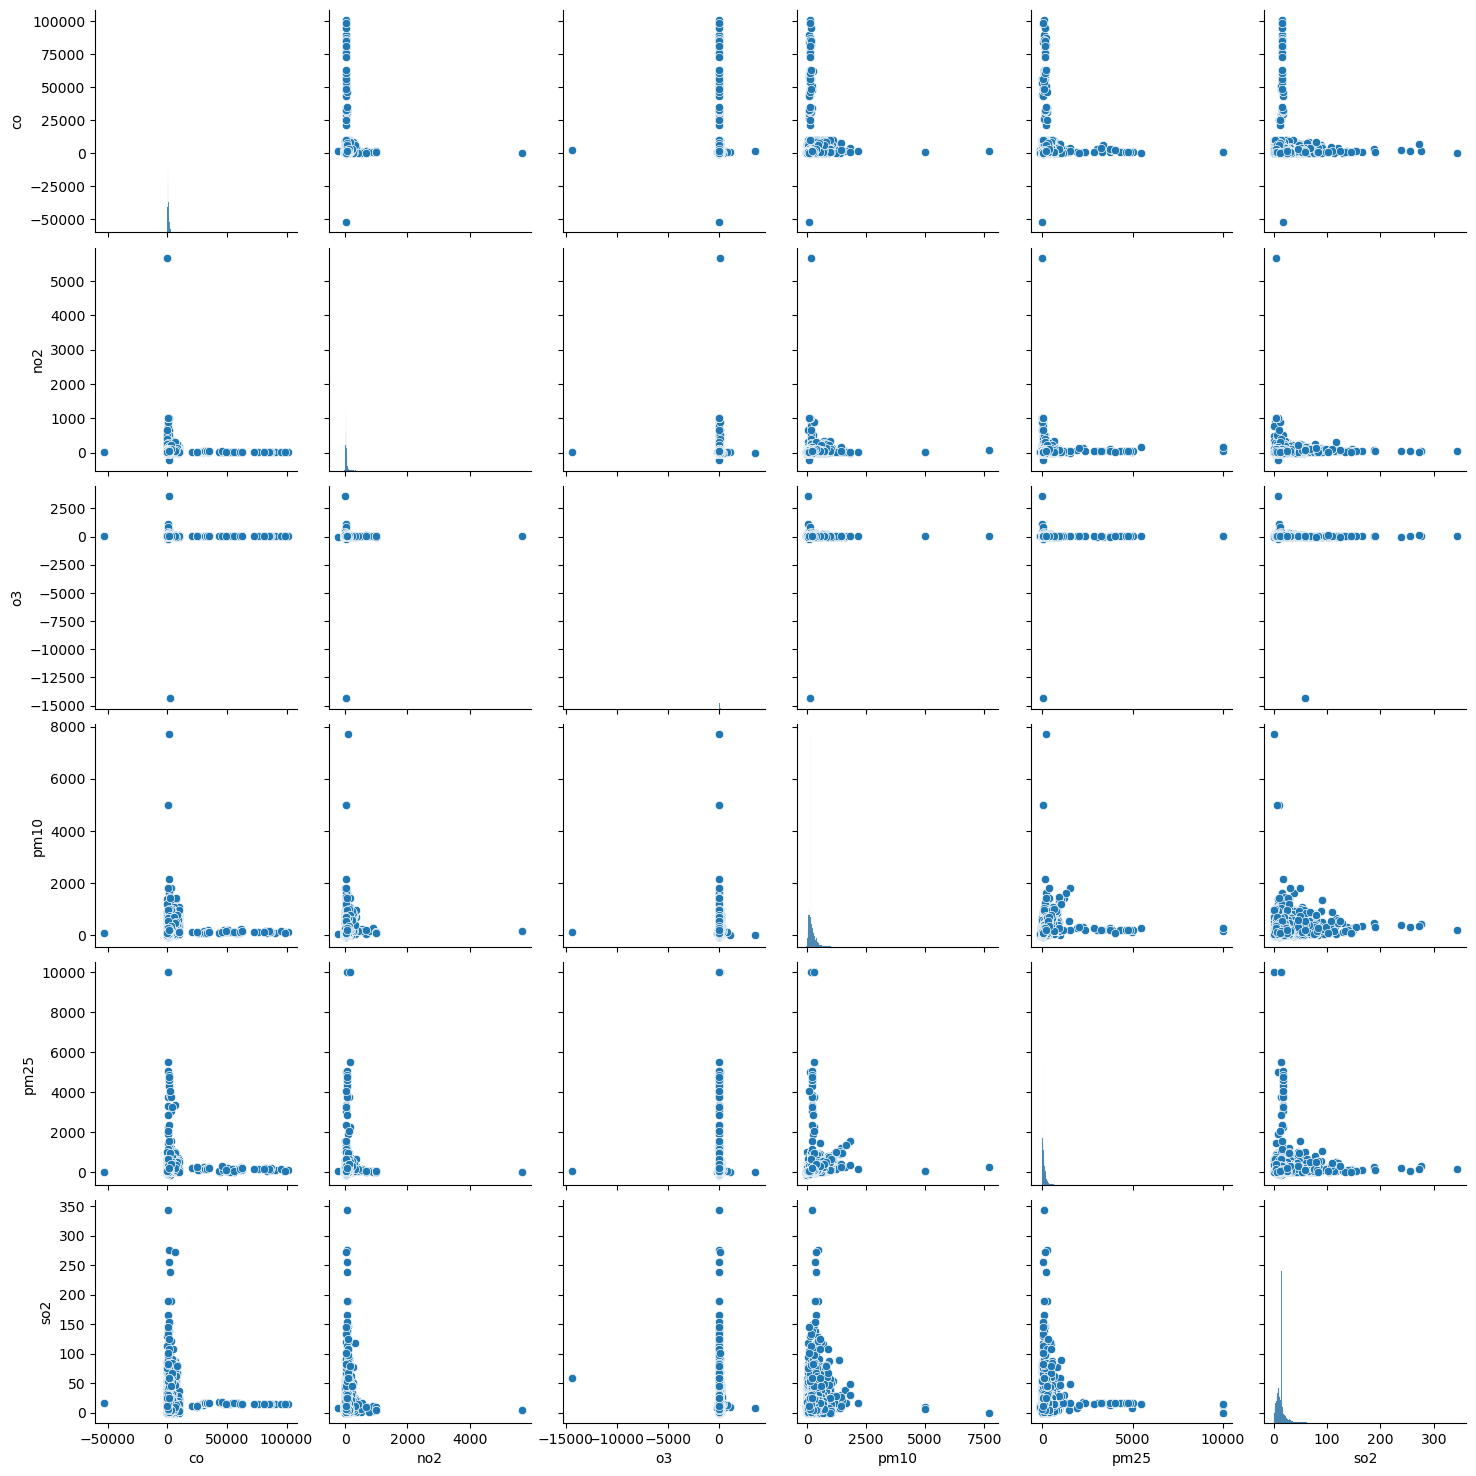

In [7]:
# c. Examine the correlation between different pollutants
sns.pairplot(df_sample[['co', 'no2', 'o3', 'pm10', 'pm25', 'so2']])
plt.show()

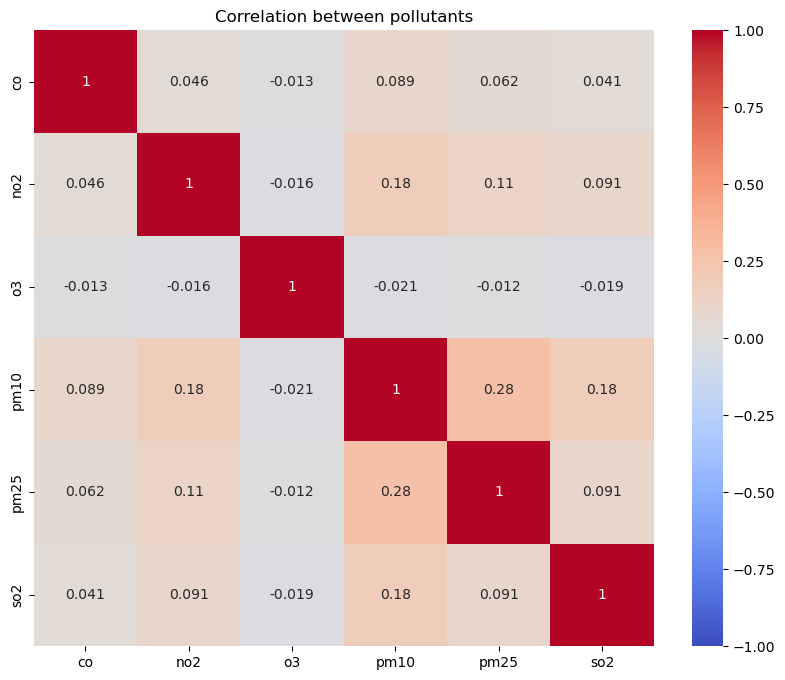

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_sample[pollutants].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between pollutants')
plt.show()

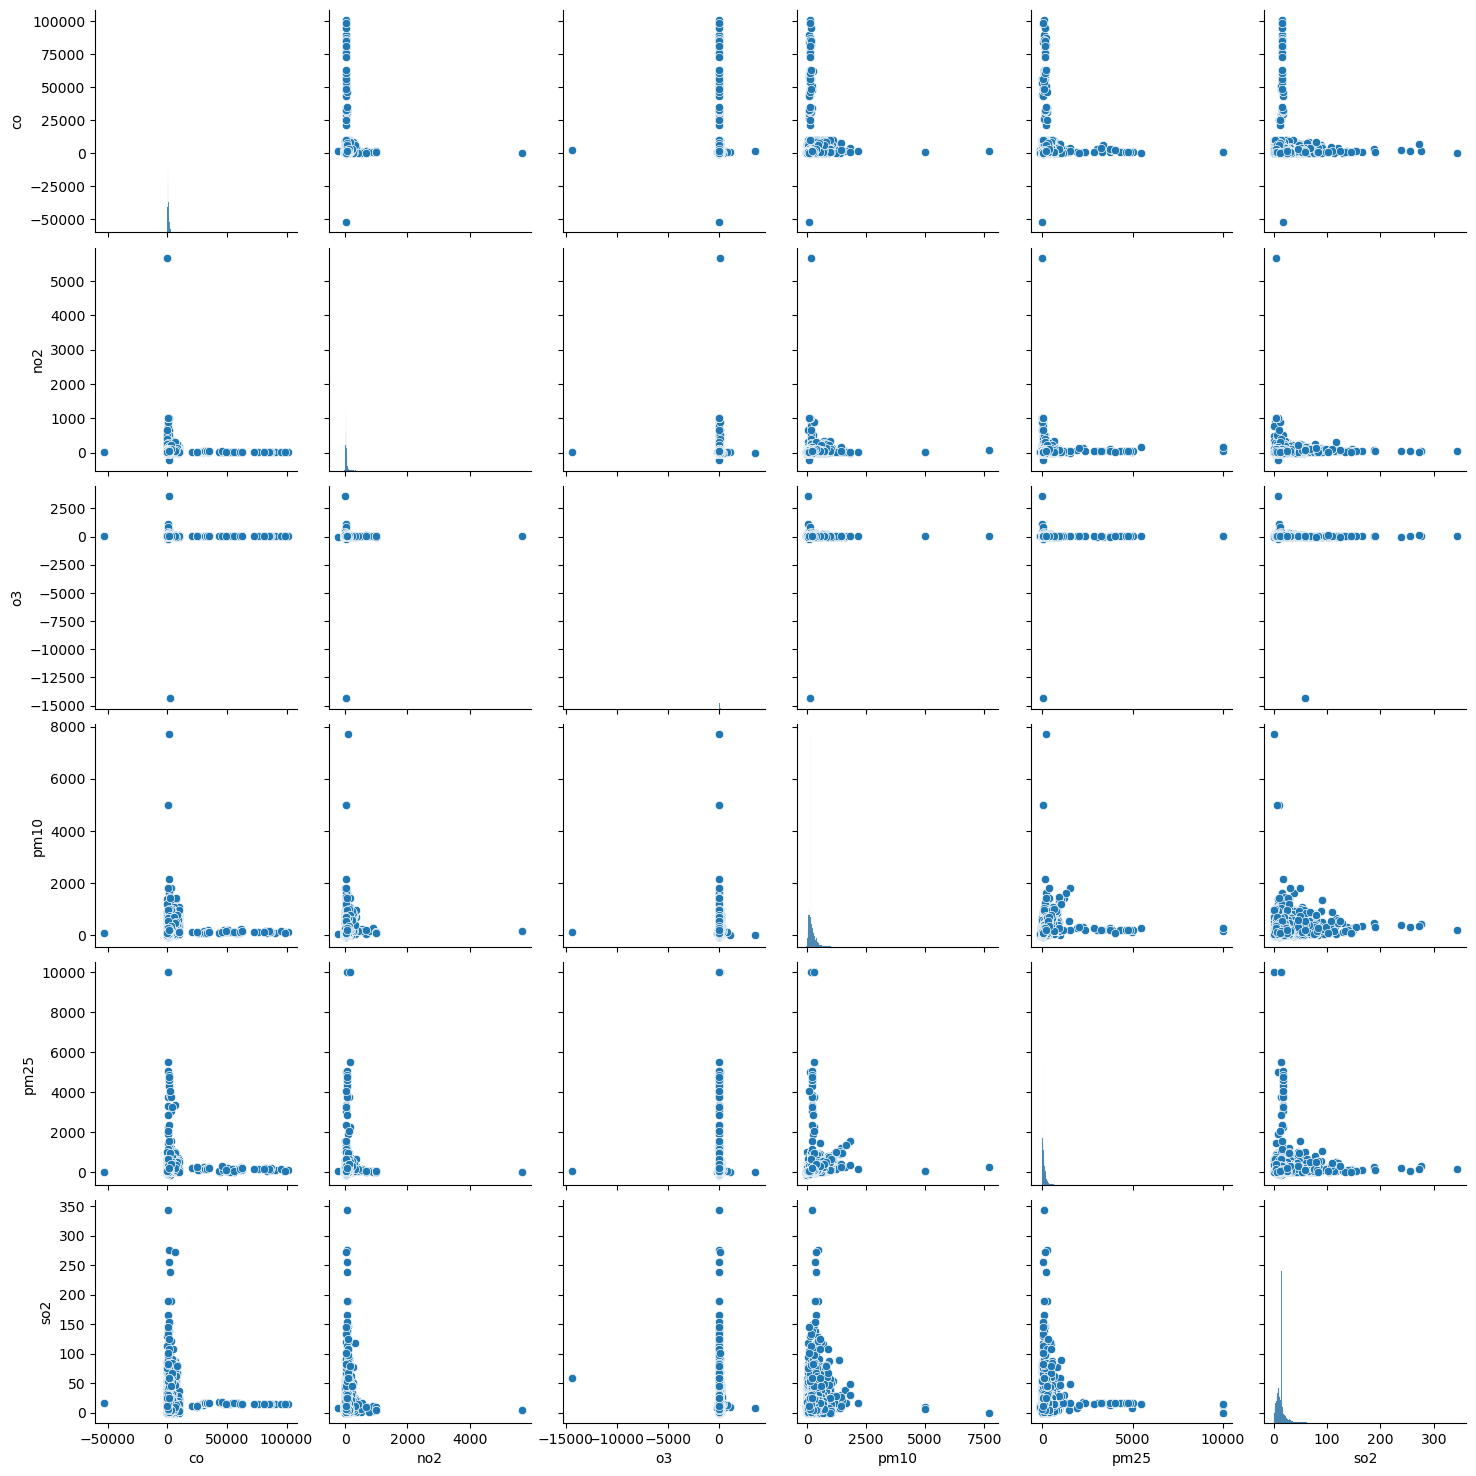

In [16]:
sns.pairplot(df_sample[pollutants])
plt.show()


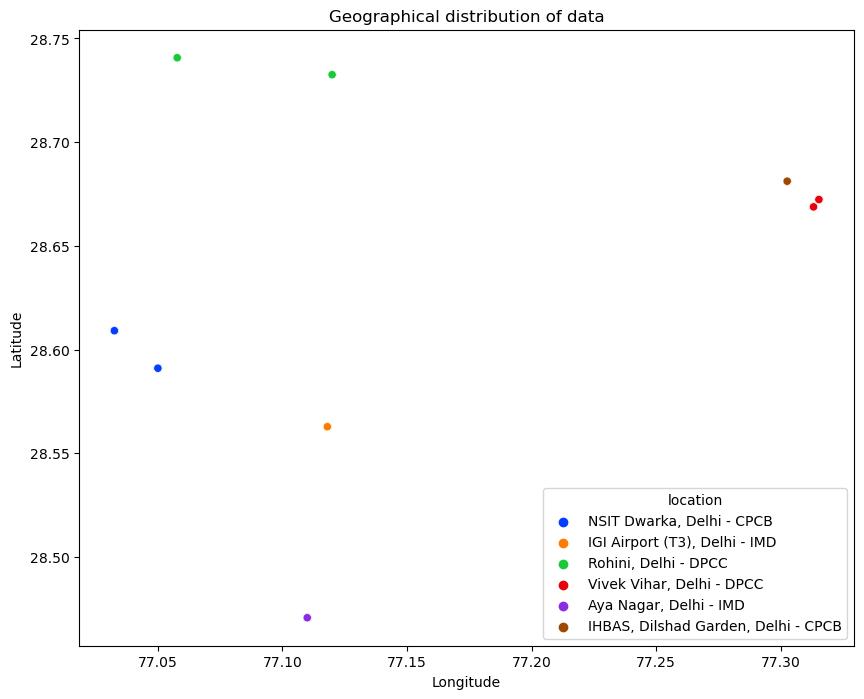

In [17]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_sample, x='longitude', y='latitude', hue='location', palette='bright')
plt.title('Geographical distribution of data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

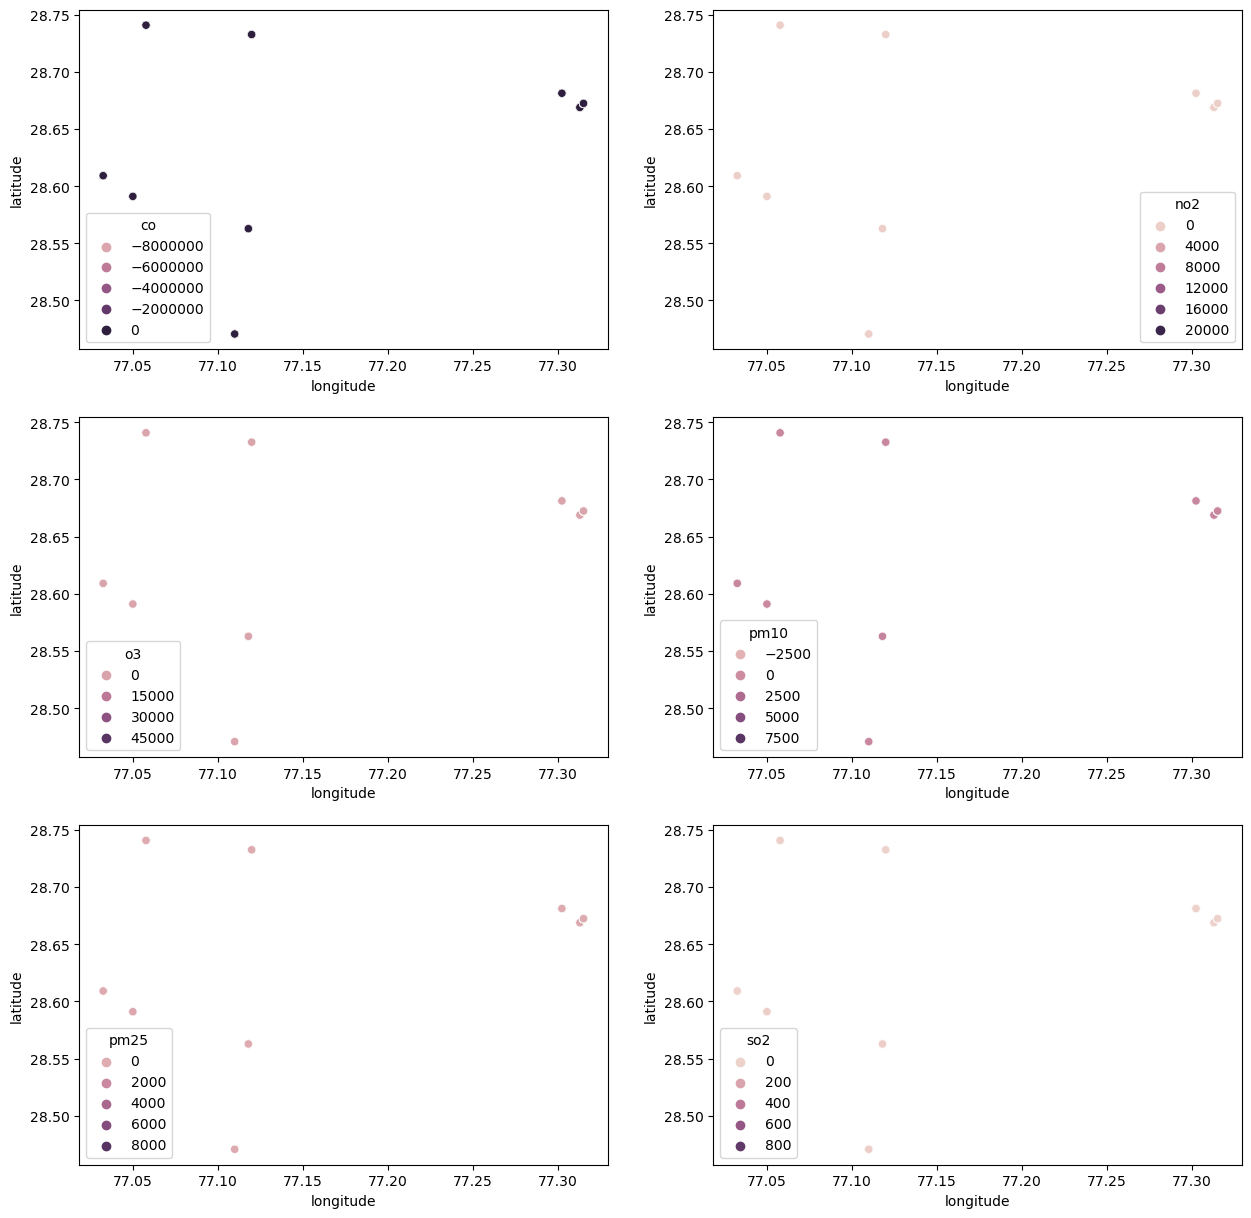

In [8]:
# d. Create scatter plots to visualize the spatial distribution of pollutant concentrations
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
pollutants = ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2']
for i, ax in enumerate(axes.flat):
    sns.scatterplot(data=df, x='longitude', y='latitude', hue=pollutants[i], ax=ax)
plt.show()

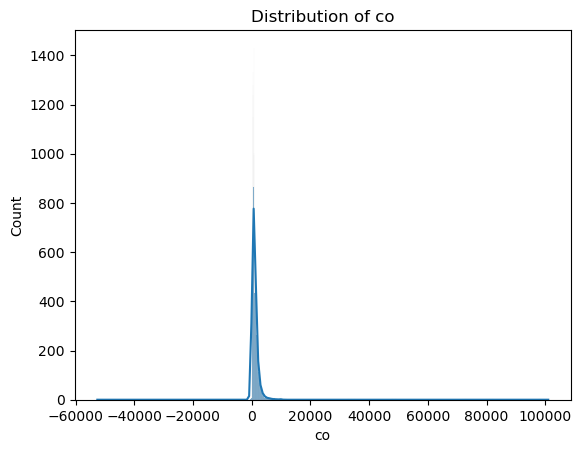

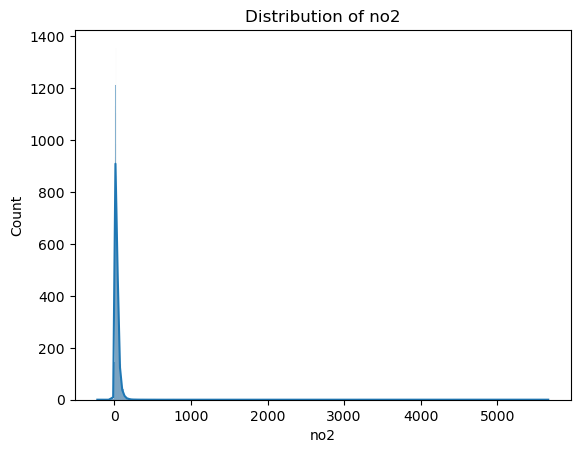

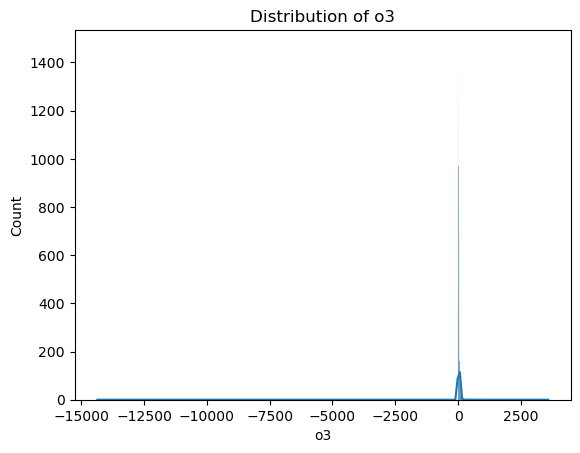

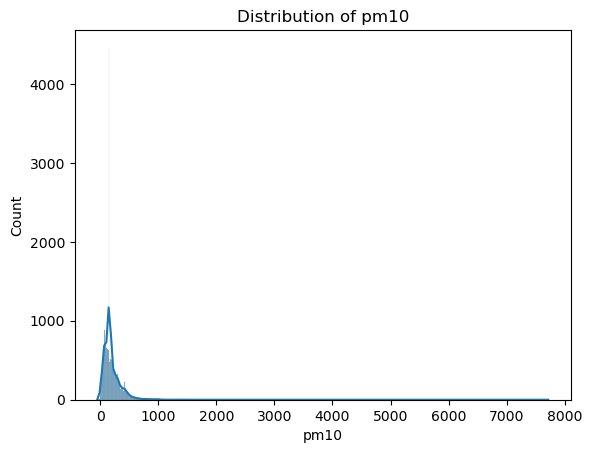

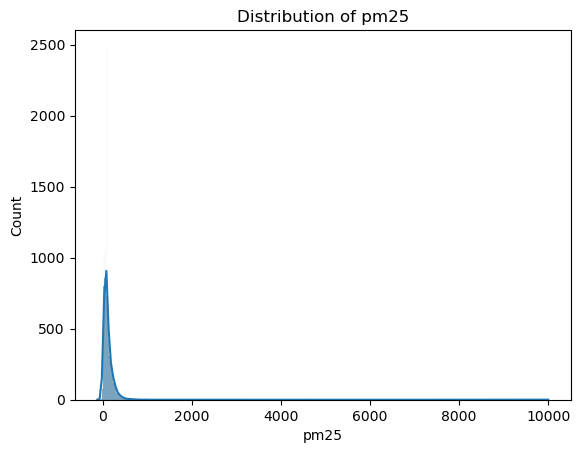

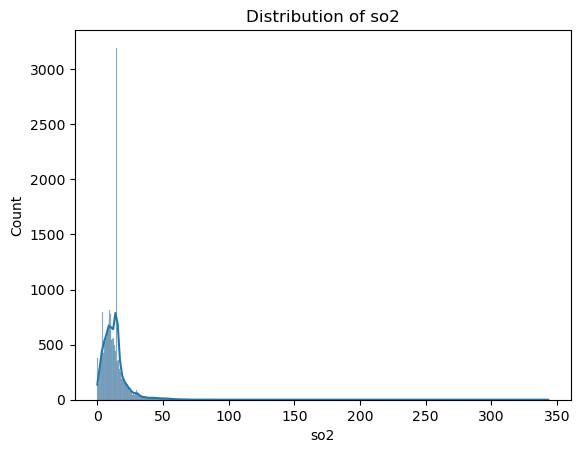

In [9]:
pollutants = ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2']

for pollutant in pollutants:
    sns.histplot(df_sample[pollutant], kde=True)
    plt.title(f'Distribution of {pollutant}')
    plt.show()

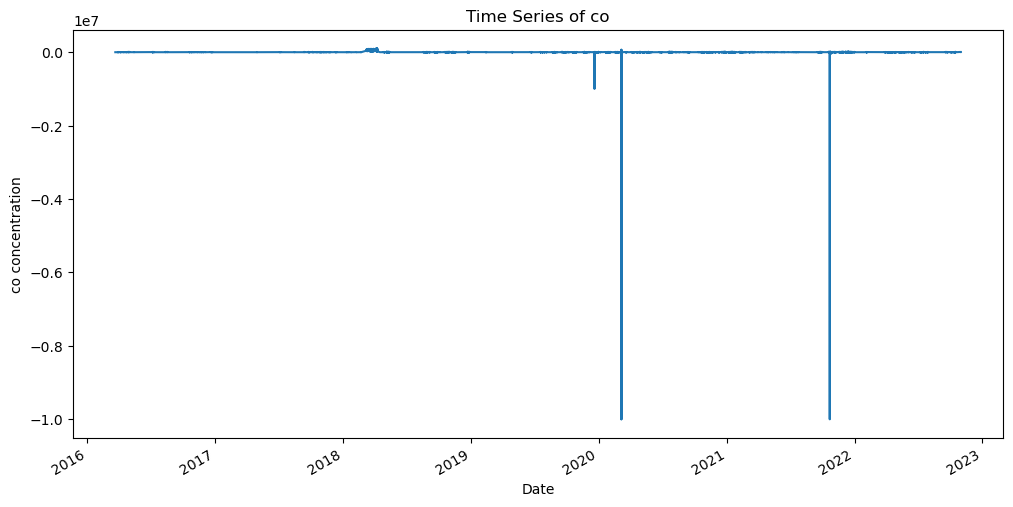

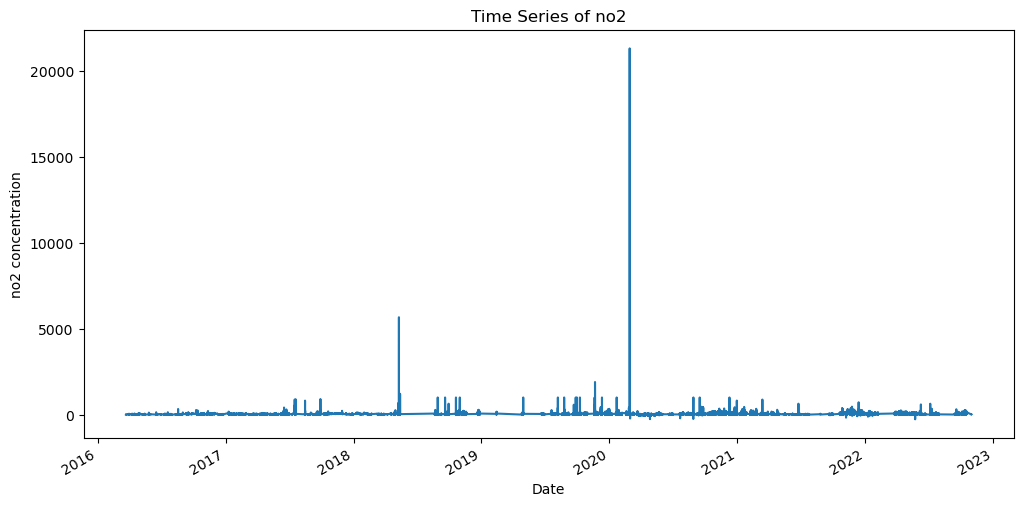

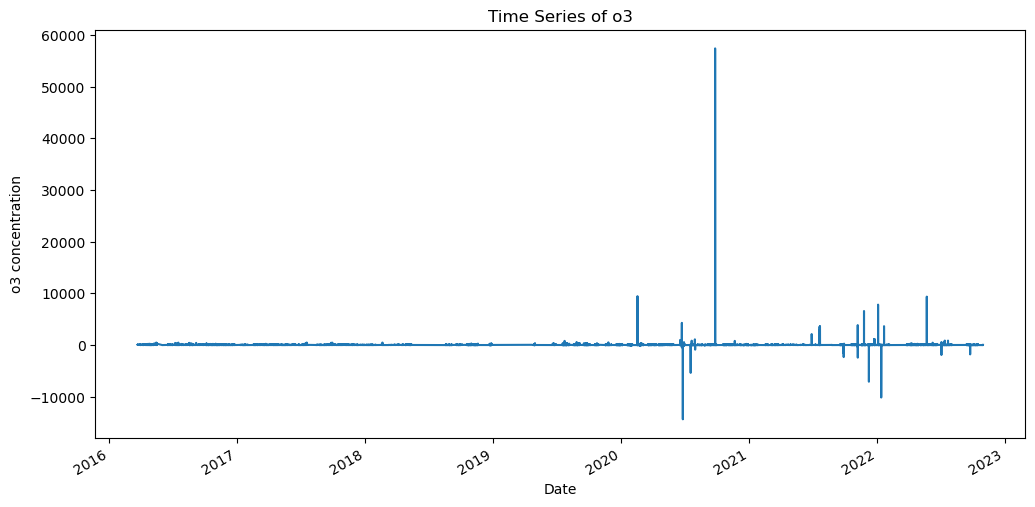

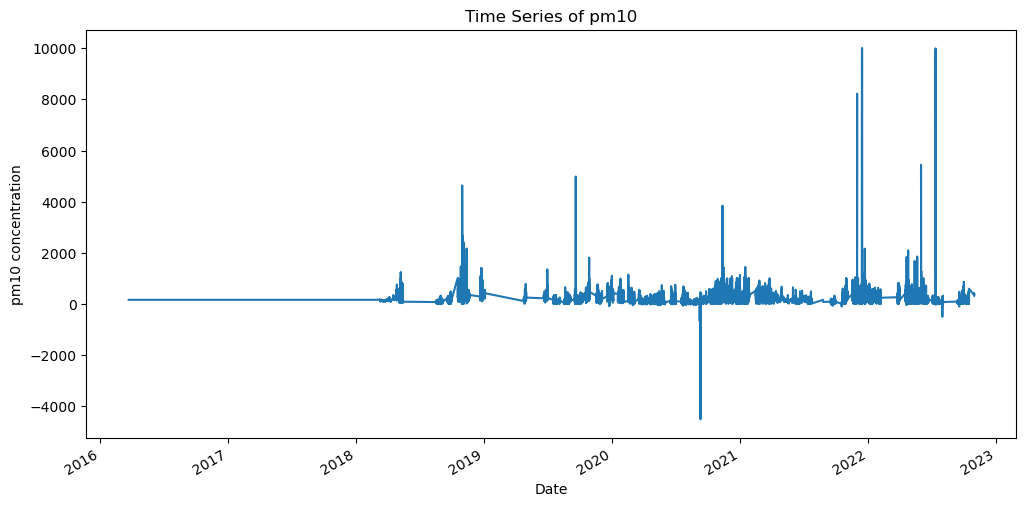

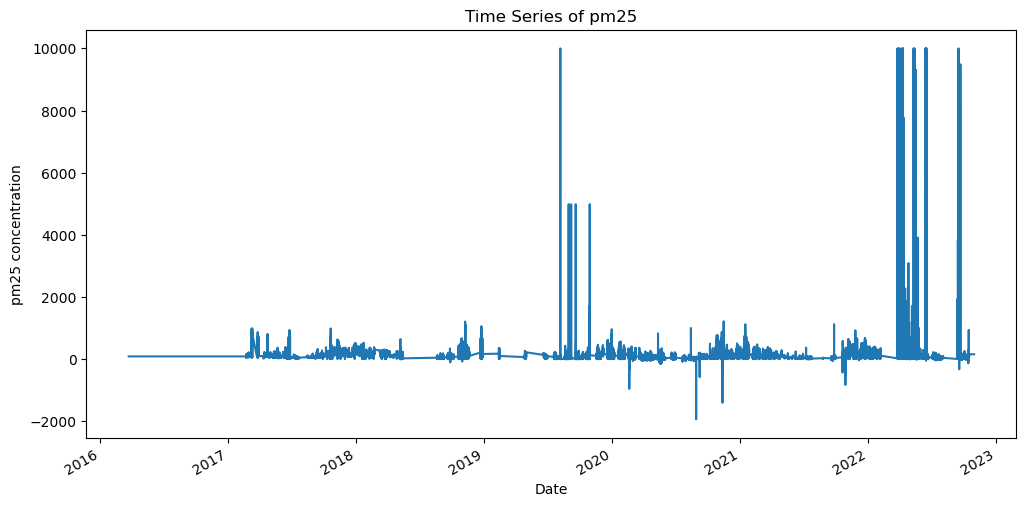

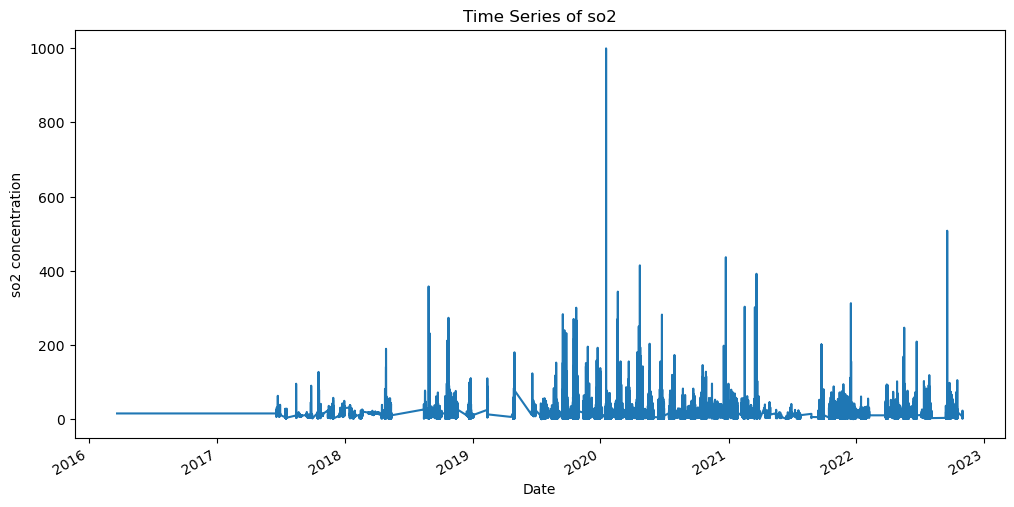

In [18]:
# First, make sure 'date_utc' column is in datetime format
df['date_utc'] = pd.to_datetime(df['date_utc'])

# Then, set 'date_utc' as index for easier time series plotting
df.set_index('date_utc', inplace=True)

# Now, plot the time series for each pollutant
for pollutant in pollutants:
    plt.figure(figsize=(12, 6))
    df[pollutant].plot()
    plt.title(f'Time Series of {pollutant}')
    plt.xlabel('Date')
    plt.ylabel(f'{pollutant} concentration')
    plt.show()

In [10]:
# a. Plot the distribution of pollutants
#sns.histplot(df[['co', 'no2', 'o3', 'pm10', 'pm25', 'so2']], kde=True)
#plt.show()

In [11]:
# b. Visualize the time series for each pollutant and location
#for location in df['location'].unique():
    #location_data = df[df['location'] == location]
    #location_data.set_index('date_utc')[['co', 'no2', 'o3', 'pm10', 'pm25', 'so2']].plot()
    #plt.title(location)
    #plt.show()

In [12]:
# c. Examine the correlation between different pollutants
#sns.pairplot(df[['co', 'no2', 'o3', 'pm10', 'pm25', 'so2']])
#plt.show()

In [13]:
# d. Create scatter plots to visualize the spatial distribution of pollutant concentrations
#fig, axes = plt.subplots(3, 2, figsize=(15, 15))
#pollutants = ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2']
#for i, ax in enumerate(axes.flat):
    #sns.scatterplot(data=df, x='longitude', y='latitude', hue=pollutants[i], ax=ax)
#plt.show()

# e. Identify potential outliers and investigate their potential causes
# This step depends on the specific domain knowledge and data

In [14]:
# Check for zero values in the dataframe
(df == 0).sum()

date_utc        0
location        0
latitude        0
longitude       0
co           4588
no2          2568
o3           1393
pm10         1771
pm25         2355
so2          2579
dtype: int64

In [20]:
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

pollutant_columns = ['co', 'no2', 'o3', 'pm10', 'pm25', 'so2']

for col in pollutant_columns:
    outliers_iqr = find_outliers_iqr(df[col])
    print(f"Number of outliers in {col} using IQR method: {outliers_iqr.sum()}")

Number of outliers in co using IQR method: 13484
Number of outliers in no2 using IQR method: 13093
Number of outliers in o3 using IQR method: 15479
Number of outliers in pm10 using IQR method: 12582
Number of outliers in pm25 using IQR method: 13733
Number of outliers in so2 using IQR method: 15571
